In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
header = ["regression_name", "dataset", "poisoning_threshold", "dataset_size", "num_lookups", "mean", "median", "log_error", "d_log_error", "mse_error", "build_time"]
legitimate_df = pd.read_csv("../data/benchmark_legitimate.csv", delimiter = ";", names = header)
poisoned_df = pd.read_csv("../data/benchmark_poisoned.csv", delimiter = ";", names = header)

In [3]:
legitimate_df.head()

,regression_name,dataset,poisoning_threshold,dataset_size,num_lookups,mean,median,log_error,d_log_error,mse_error,build_time
0,SLR,poisoning,0.01,1000,1000000,25.0239,24.997,2204,2483,32850,2000
1,LogTE,poisoning,0.01,1000,1000000,25.5736,25.156,2201,2483,37445,440000
2,DLogTE,poisoning,0.01,1000,1000000,25.2543,25.184,2190,2466,34033,76000
3,2P,poisoning,0.01,1000,1000000,25.7829,25.085,2174,2430,34404,2506000
4,TheilSen,poisoning,0.01,1000,1000000,25.2602,25.120,2173,2444,34795,6449000


In [4]:
datasets = ["poisoning"]
regressions = ["SLR", "LogTE", "DLogTE", "2P", "TheilSen", "LAD", "ALEX", "PGM"]
poisoning_thresholds = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20]

In [5]:
median_lookup_time_impact = {}

for dataset in datasets:
    # calculate ratio loss for different datasets / regression methods
    # ratio loss: MSE_poisoned / MSE_legit
    median_lookup_time_impact_per_regression = {}

    for regression in regressions:

        median_lookup_time_impact_per_poisoning_threshold = []
        for poisoning_threshold in poisoning_thresholds:
            lookup_time_legit = legitimate_df[(legitimate_df['dataset'] == dataset) & (legitimate_df["regression_name"] == regression) & (legitimate_df["poisoning_threshold"] == poisoning_threshold)]['median']
            lookup_time_poisoned = poisoned_df[(poisoned_df['dataset'] == dataset) & (poisoned_df["regression_name"] == regression) & (poisoned_df["poisoning_threshold"] == poisoning_threshold)]['median']
            median_lookup_time_impact_per_poisoning_threshold.append(lookup_time_poisoned.values[0] / lookup_time_legit.values[0])

        median_lookup_time_impact_per_regression[regression] = median_lookup_time_impact_per_poisoning_threshold

    median_lookup_time_impact[dataset] = median_lookup_time_impact_per_regression

In [6]:
mean_lookup_time_impact = {}

for dataset in datasets:
    # calculate ratio loss for different datasets / regression methods
    # ratio loss: MSE_poisoned / MSE_legit
    mean_lookup_time_impact_per_regression = {}

    for regression in regressions:

        mean_lookup_time_impact_per_poisoning_threshold = []
        for poisoning_threshold in poisoning_thresholds:
            lookup_time_legit = legitimate_df[(legitimate_df['dataset'] == dataset) & (legitimate_df["regression_name"] == regression) & (legitimate_df["poisoning_threshold"] == poisoning_threshold)]['mean']
            lookup_time_poisoned = poisoned_df[(poisoned_df['dataset'] == dataset) & (poisoned_df["regression_name"] == regression) & (poisoned_df["poisoning_threshold"] == poisoning_threshold)]['mean']
            mean_lookup_time_impact_per_poisoning_threshold.append(lookup_time_poisoned.values[0] / lookup_time_legit.values[0])

        mean_lookup_time_impact_per_regression[regression] = mean_lookup_time_impact_per_poisoning_threshold

    mean_lookup_time_impact[dataset] = mean_lookup_time_impact_per_regression

In [7]:
mean_lookup_time_overall_legit = {}
mean_lookup_time_overall_poisoned = {}

for dataset in datasets:

    mean_lookup_time_per_regression_legit = {}
    mean_lookup_time_per_regression_poisoned = {}

    for regression in regressions:

        mean_lookup_per_poisoning_threshold_legit = []
        mean_lookup_per_poisoning_threshold_poisoned = []
        for poisoning_threshold in poisoning_thresholds:
            lookup_time_legit = legitimate_df[(legitimate_df['dataset'] == dataset) & (legitimate_df["regression_name"] == regression) & (legitimate_df["poisoning_threshold"] == poisoning_threshold)]['mean']
            lookup_time_poisoned = poisoned_df[(poisoned_df['dataset'] == dataset) & (poisoned_df["regression_name"] == regression) & (poisoned_df["poisoning_threshold"] == poisoning_threshold)]['mean']
            mean_lookup_per_poisoning_threshold_legit.append(lookup_time_legit.item())
            mean_lookup_per_poisoning_threshold_poisoned.append(lookup_time_poisoned.item())

        mean_lookup_time_per_regression_legit[regression] = np.mean(mean_lookup_per_poisoning_threshold_legit)
        mean_lookup_time_per_regression_poisoned[regression] = np.mean(mean_lookup_per_poisoning_threshold_poisoned)

    mean_lookup_time_overall_legit[dataset] = mean_lookup_time_per_regression_legit
    mean_lookup_time_overall_poisoned[dataset] = mean_lookup_time_per_regression_poisoned

In [8]:
lookup_time_legit

159    43.3413
Name: mean, dtype: float64

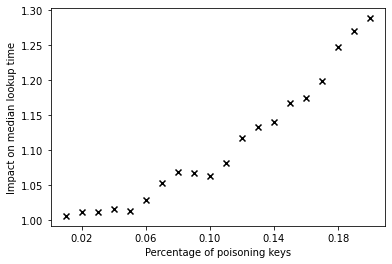

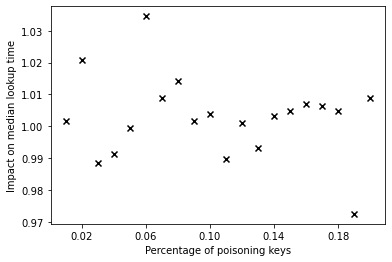

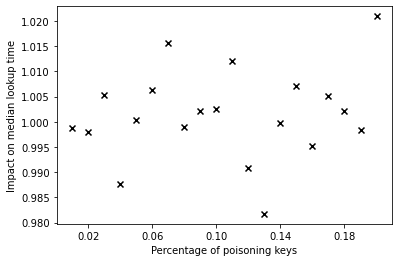

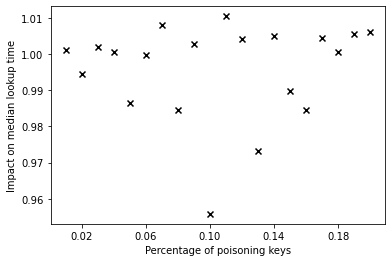

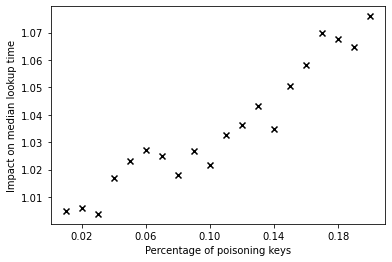

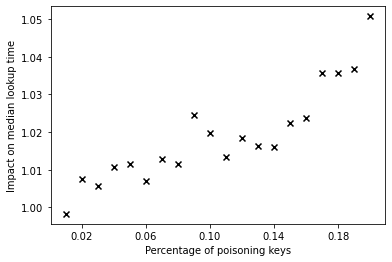

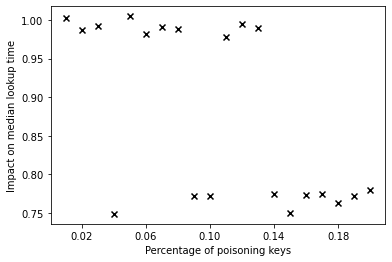

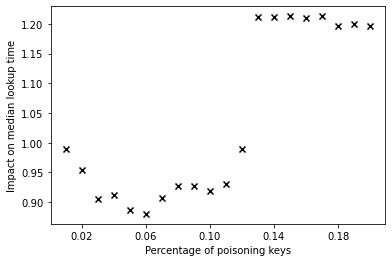

In [9]:
for dataset in datasets:

    for regression in regressions:

        plt.scatter(poisoning_thresholds, median_lookup_time_impact[dataset][regression],  color='black', marker="x")
        plt.xticks(np.arange(0.02, 0.22, 0.04))
        #plt.title(regression)
        plt.xlabel('Percentage of poisoning keys')
        plt.ylabel('Impact on median lookup time')
        plt.show()

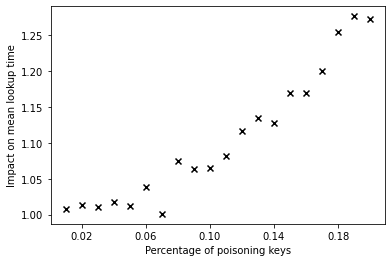

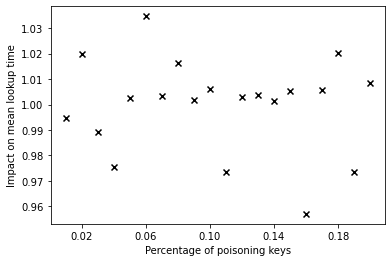

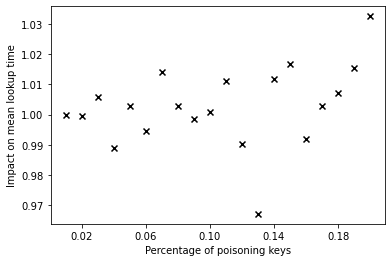

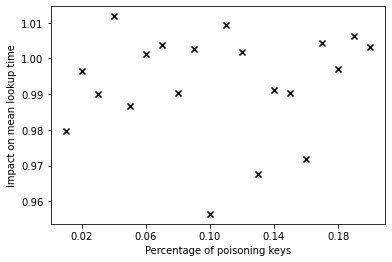

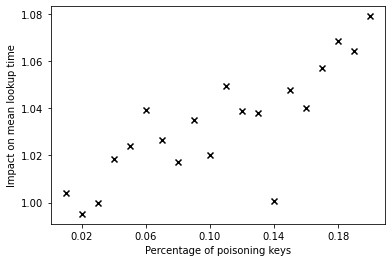

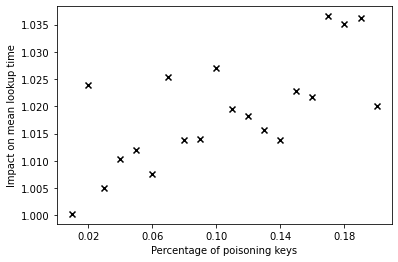

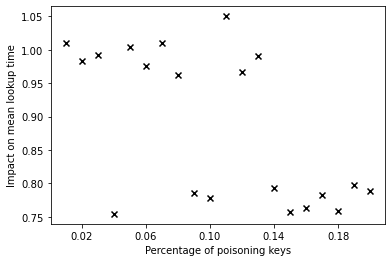

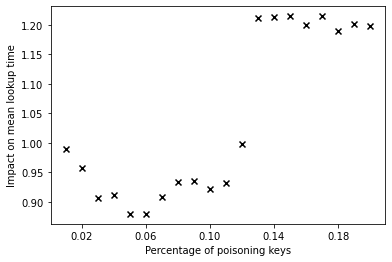

In [10]:
for dataset in datasets:

    for regression in regressions:

        plt.scatter(poisoning_thresholds, mean_lookup_time_impact[dataset][regression],  color='black', marker="x")
        plt.xticks(np.arange(0.02, 0.22, 0.04))
        #plt.title(regression)
        plt.xlabel('Percentage of poisoning keys')
        plt.ylabel('Impact on mean lookup time')
        plt.show()

In [11]:
mean_lookup_time_overall_legit['poisoning'].values()

dict_values([25.205904999999998, 25.225725, 25.170975000000002, 25.36833, 25.430189999999993, 25.018925000000003, 17.762770000000003, 43.3876])

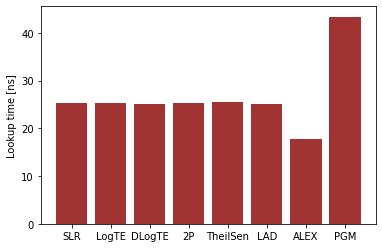

In [12]:
y_pos = np.arange(len(regressions))

plt.bar(y_pos, mean_lookup_time_overall_legit['poisoning'].values(), align='center', alpha=0.8, color="darkred")
plt.xticks(y_pos, regressions)
plt.ylabel('Lookup time [ns]')
#plt.title('Median lookup time of learned indexes averaged across all poisoning thresholds (non-poisoned)')
plt.show()

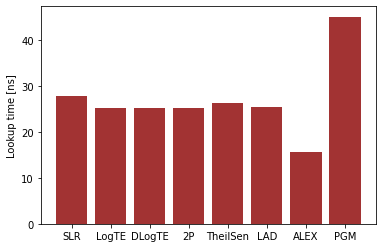

In [13]:
y_pos = np.arange(len(regressions))

plt.bar(y_pos, mean_lookup_time_overall_poisoned['poisoning'].values(), align='center', alpha=0.8, color="darkred")
plt.xticks(y_pos, regressions)
plt.ylabel('Lookup time [ns]')
#plt.title('Mean lookup time of learned indexes averaged across all poisoning thresholds (poisoned)')
plt.show()